In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, f1_score, accuracy_score
import numpy as np

# 데이터셋 로드
wine = load_wine()
X = wine.data
y = wine.target

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

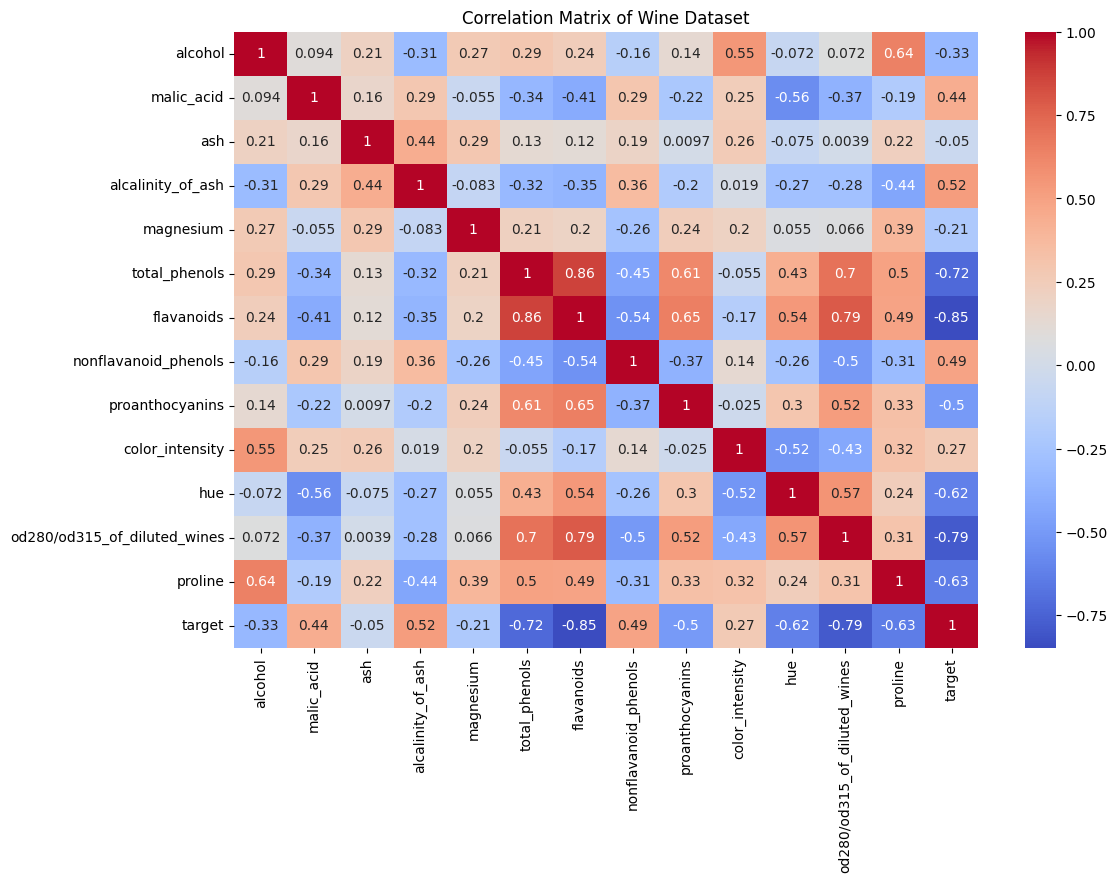

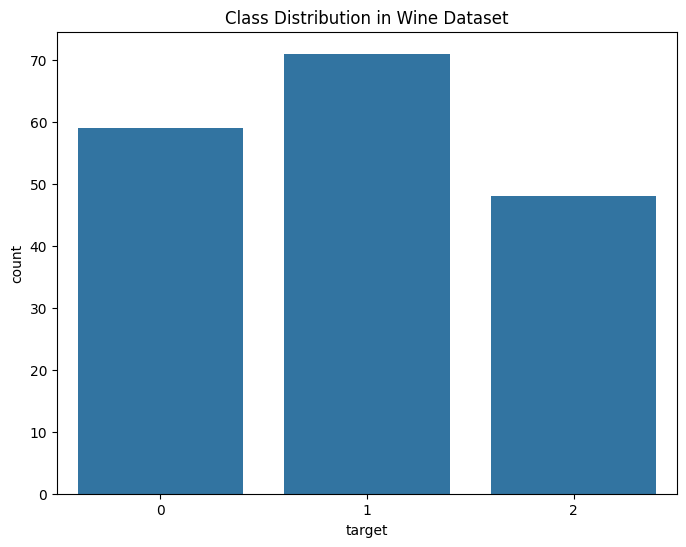

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 생성
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

# 통계 요약
summary = df_wine.describe()
print(summary)

# 상관 행렬
corr_matrix = df_wine.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Dataset')
plt.show()

# 클래스 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_wine)
plt.title('Class Distribution in Wine Dataset')
plt.show()

In [3]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [10]:
# 데이터셋 나누기 (Train/Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [11]:
# 정규화 방법 리스트
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# 결과 저장
results = {}

In [12]:
# RandomForest 하이퍼파라미터 튜닝
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# DecisionTree 하이퍼파라미터 튜닝
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
best_dt_model = dt_grid_search.best_estimator_

# SVM 하이퍼파라미터 튜닝
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_

# KNN 하이퍼파라미터 튜닝
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
best_knn_model = knn_grid_search.best_estimator_

# 최적 모델로 예측 및 평가
models = {
    'RandomForest': best_rf_model,
    'DecisionTree': best_dt_model,
    'SVM': best_svm_model,
    'KNN': best_knn_model
}

for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Scaler: {scaler_name}")
    
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        print(f"  Model: {model_name}")
        print(classification_report(y_test, y_pred))

Scaler: StandardScaler
  Model: RandomForest
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.87      0.93        31
           2       0.86      1.00      0.93        19

    accuracy                           0.94        72
   macro avg       0.94      0.96      0.95        72
weighted avg       0.95      0.94      0.94        72

  Model: DecisionTree
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.90      0.95        31
           2       0.90      1.00      0.95        19

    accuracy                           0.96        72
   macro avg       0.95      0.97      0.96        72
weighted avg       0.96      0.96      0.96        72

  Model: SVM
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.97      0.94      0.95      